In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Dropping a few columns

In [8]:
df1 = df.drop(['availability', 'society'], axis='columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df1 = df1.dropna()

df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
df1['Bedrooms'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df1['Bedrooms'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
## Checking the type of info for the homes that have rooms > 15
df1[df1['Bedrooms']> 15]

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def isFloat(x):
    try:
        float(x)
    except:
        return False 
    
    return True

In [18]:
df1[~df1.total_sqft.apply(isFloat)].head(15)

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [19]:
def sqftAvg(x):
    tokens = x.split('-')     # Doing this for the range of sqfts
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]) ) / 2
    
    try:
        return float(x)
    except:
        return None
    


In [20]:
df2 = df1.copy()

df2['total_sqft'] = df2['total_sqft'].apply(sqftAvg)
df2.head(15)

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


#### Feature Engineering: Adding important features for outliers

In [21]:
df3 = df2.copy()

In [22]:
df3['pricePerSqFt'] = df3.price * 100000 / df3.total_sqft
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [23]:
len(df3.location.unique())

1265

###### 1265 might cause dimensionality issue

In [24]:
df3.location = df3.location.apply(lambda x: x.strip())
locStats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
locStats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [25]:
len(locStats[locStats <=10])

1017

In [26]:
locStatsLessThan10 = locStats[locStats <=10]
df3.location = df3.location.apply(lambda x: 'other' if x in locStatsLessThan10 else x)
df3.head(20)

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


#### Checking for Outliers

In [27]:
# On an average, sqft/number of beds should be 300. Using this information to check for outliers
df3[df3.total_sqft / df3.Bedrooms < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [28]:
df4 = df3[~ (df3.total_sqft / df3.Bedrooms < 300)]
df4.shape

(12055, 9)

In [29]:
df4.pricePerSqFt.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: pricePerSqFt, dtype: float64

In [30]:
def removeextremePricepersqft(x):
    df = pd.DataFrame()
    for key, val in x.groupby('location'):
        m = np.mean(val.pricePerSqFt)
        sd = np.std(val.pricePerSqFt)
        df1 = val[(val.pricePerSqFt > (m - sd)) & (val.pricePerSqFt <= (m + sd))]
        df = pd.concat([df, df1], ignore_index=True)
    
    return df
df5 = removeextremePricepersqft(df4)
df5.shape

(9848, 9)

In [31]:
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [32]:
df5.Bedrooms.dtype

dtype('int64')

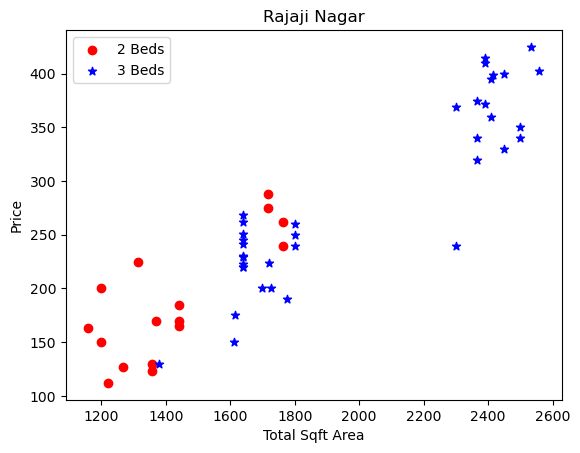

In [33]:
def plot(df, location):
    twoBeds = df[(df.Bedrooms == 2) & (df.location == location)]
    threeBeds = df[(df.Bedrooms == 3) & (df.location == location)]
    plt.scatter(twoBeds.total_sqft, twoBeds.price, color='red', label='2 Beds')
    plt.scatter(threeBeds.total_sqft, threeBeds.price, marker='*', color='blue', label='3 Beds')
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot(df5,'Rajaji Nagar')

Text(0, 0.5, 'Count')

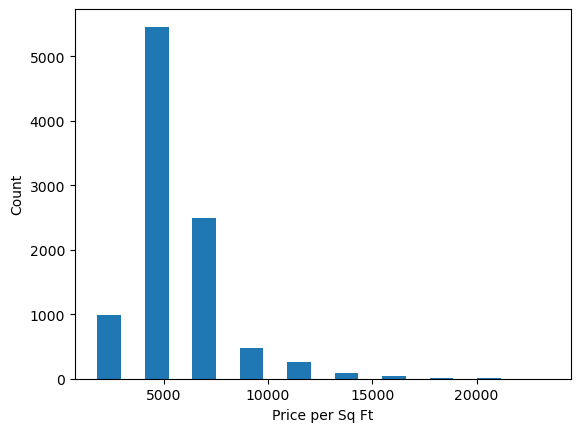

In [34]:
plt.hist(df5.pricePerSqFt, rwidth=0.5)
plt.xlabel('Price per Sq Ft')
plt.ylabel('Count')

In [35]:
df5[df5['bath'] > 8]

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
3599,Built-up Area,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826087
4893,Super built-up Area,Mico Layout,9 BHK,5000.0,9.0,3.0,210.0,9,4200.000000
5415,Built-up Area,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,3.0,240.0,9,6666.666667
7729,Super built-up Area,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
8091,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9269,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

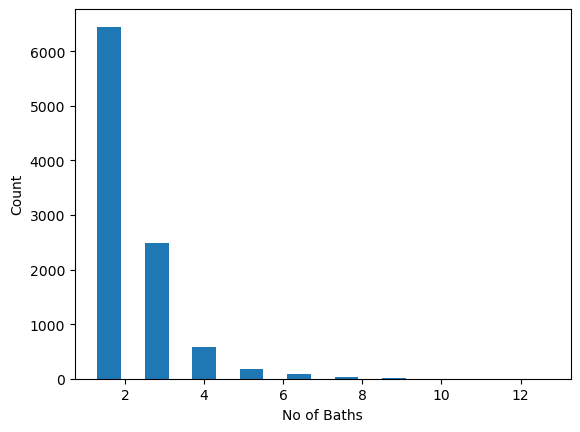

In [36]:
plt.hist(df5.bath, rwidth=0.5)
plt.xlabel('No of Baths')
plt.ylabel('Count')

In [37]:
df5[df5.bath>df5.Bedrooms + 2]

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms,pricePerSqFt
1542,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [38]:
df6 = df5[df5.bath < df5.Bedrooms + 2]
df6.shape

(9767, 9)

In [39]:
df7 = df6.drop(['area_type', 'pricePerSqFt', 'size'], axis='columns')

df7.head()

,location,total_sqft,bath,balcony,price,Bedrooms
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


#### Creating dummies for one hot encoding

In [40]:
dummies = pd.get_dummies(df7['location']).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df8 = pd.concat([df7, dummies.drop('other', axis='columns')], axis='columns')
df8.head()

,location,total_sqft,bath,balcony,price,Bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df9 = df8.drop('location', axis='columns')
df9.head()

,total_sqft,bath,balcony,price,Bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df9.shape

(9767, 242)

In [44]:
X = df9.drop('price', axis='columns')
y = df9.price 
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8224435347614737

#### Perform k-fold cross validation

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.84544857, 0.80131781, 0.83939528, 0.79661814, 0.80409331,
       0.80735021, 0.72899289])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def bestModelusingGridSearchCV(X, y):
    algos = {  # fixed the dictionary syntax
        'linear_regression' : {
            'model': LinearRegression(),  # added missing import
            'params': {
                # 'normalize' : [True, False]  # deprecated parameter
            }
        }, 
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],  # corrected parameter
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items(): 
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [53]:
bestModelusingGridSearchCV(X, y)

,model,best_score,best_params
0,linear_regression,0.817375,{}
1,lasso,0.635419,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.689266,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [54]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'Bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [56]:
def predict_price(location, total_sqft, bath, Bedrooms):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = Bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]



In [60]:
predict_price('Indira Nagar', 1000, 2, 2)

c:\Users\swaro\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


169.87635667079314

#### Exporting to pickle file

In [61]:
import pickle
with open('realestatepricesmodel', 'wb') as f:
    pickle.dump(lr_clf, f)

In [62]:
import json 
columns = {
    'data_cols' : [col.lower() for col in X.columns]

}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
